# Customer Segmentation Using Clustering

This notebook performs customer segmentation on the Mall Customer Segmentation Dataset using clustering techniques. The goal is to group customers based on their age, annual income, and spending behavior to help a mall understand its customer types for better marketing strategies.

### Steps:
1. Load and explore the dataset.
2. Perform Exploratory Data Analysis (EDA) to understand customer features.
3. Prepare the data for clustering.
4. Apply K-Means clustering to segment customers.
5. Visualize and interpret the clusters.
6. Evaluate clustering quality and try improvements.
7. Save the results for submission.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 1: Load the Dataset

We’ll load the Mall Customer Segmentation Dataset, which contains:
- **CustomerID**: Unique ID for each customer.
- **Gender**: Male or Female.
- **Age**: Customer's age.
- **Annual Income (k$)**: Yearly income in thousands of dollars.
- **Spending Score (1-100)**: A score based on spending behavior (1=low, 100=high).

Upload the dataset (`Mall_Customers.csv`) to Colab and load it using pandas.


In [ ]:
data=pd.read_csv("Mall_Customers.csv")

In [ ]:
print("first 5 rows of dataset");
print(data.head())

first 5 rows of dataset
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
print("\nMissing values")
print(data.isnull().sum())


Missing values
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
print("\nDataset Statistics:")
print(data.describe())


Dataset Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


## Step 2: Exploratory Data Analysis (EDA)

Let’s explore the data to understand its features:
- Plot histograms to see the distribution of numerical features.
- Use a pair plot to visualize relationships between features.
- Check correlations to see if features are related.

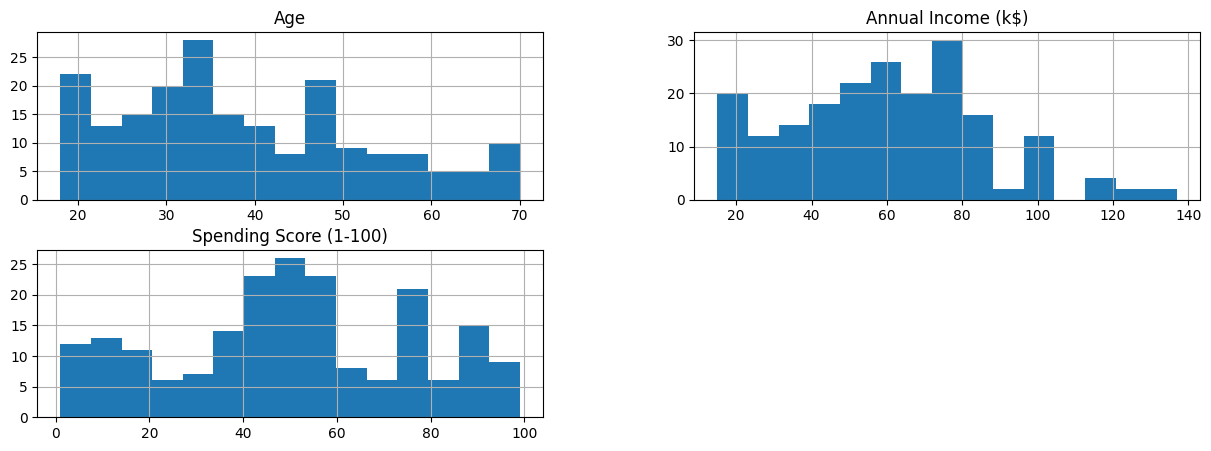

In [ ]:
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data[numerical_features].hist(bins=15, figsize=(15, 5))
plt.show()

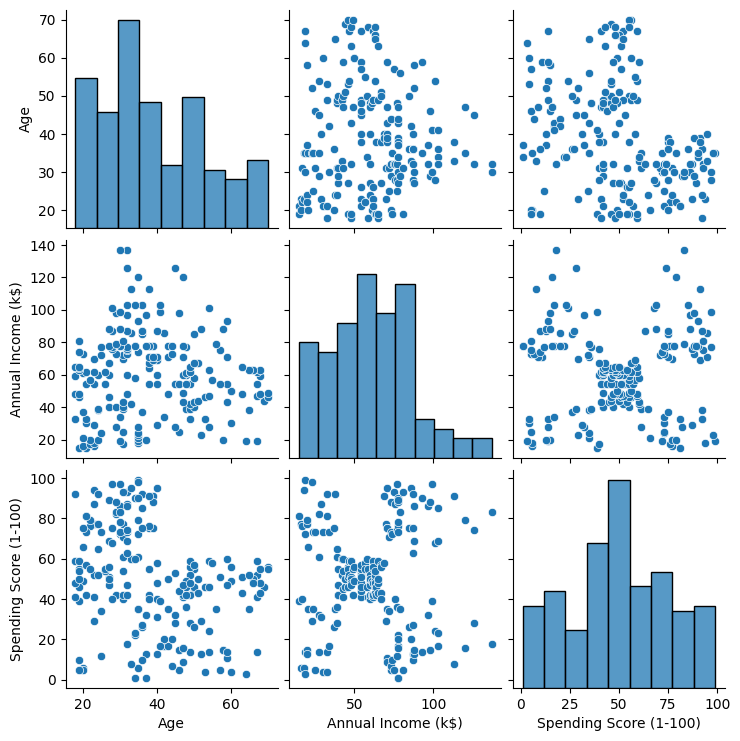

In [ ]:
sns.pairplot(data[numerical_features])
plt.show()

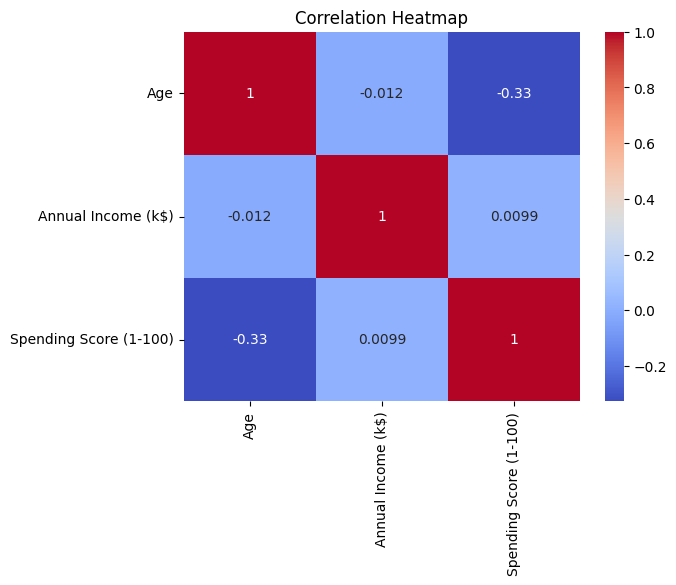

In [ ]:
corr = data[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Step 4: Prepare the Data for Clustering

## Step 3: Prepare the Data for Clustering

We’ll use `Age`, `Annual Income (k$)`, and `Spending Score (1-100)` for clustering. Since these features have different scales, we’ll standardize them to ensure fair clustering.

In [ ]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 4: Apply K-Means Clustering

We’ll use K-Means clustering to segment customers:
- Use the elbow method to find the optimal number of clusters (`k`).
- Train the K-Means model with the best `k`.

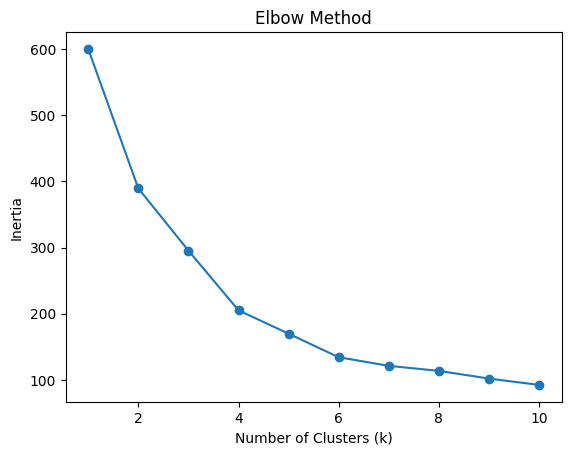

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Train K-Means with Chosen k


In [ ]:
k = 4  # Adjust based on elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_

## Step 5: Visualize the Clusters

Let’s visualize the clusters using 2D scatter plots and a 3D plot to see how customers are grouped.

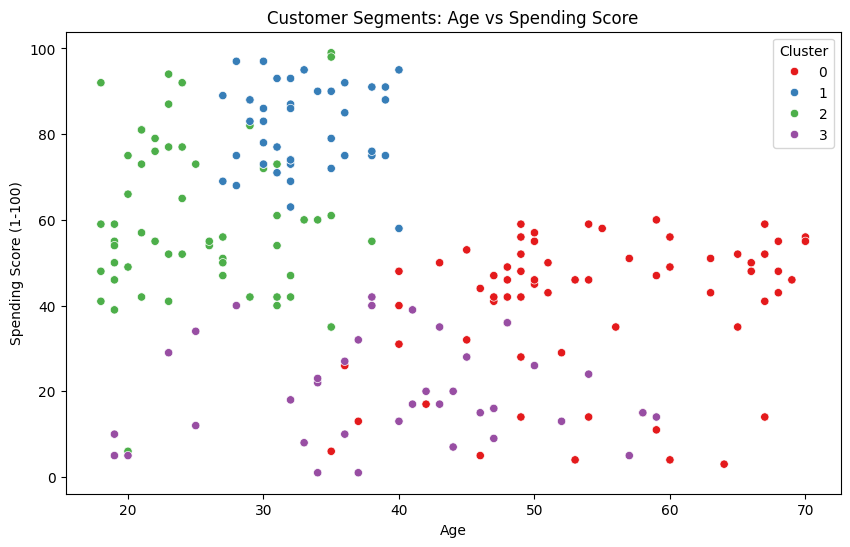

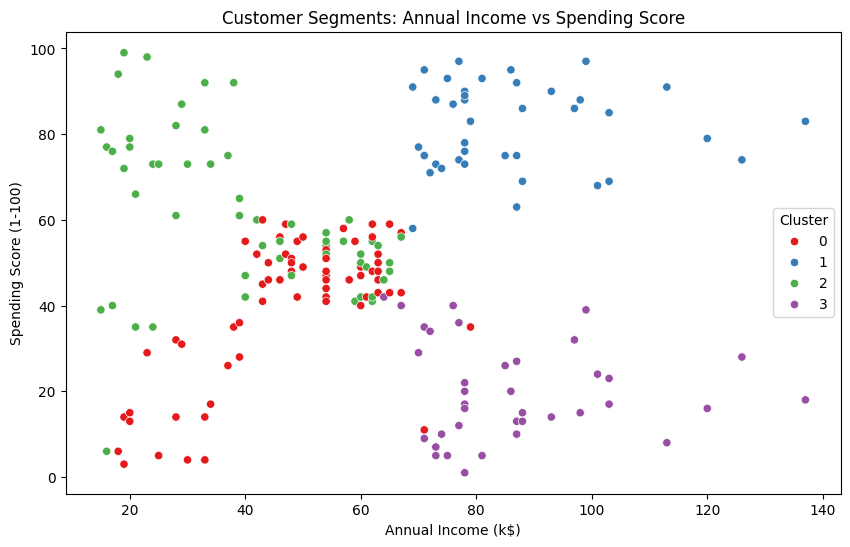

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Segments: Age vs Spending Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Segments: Annual Income vs Spending Score')
plt.show()

3D Plot

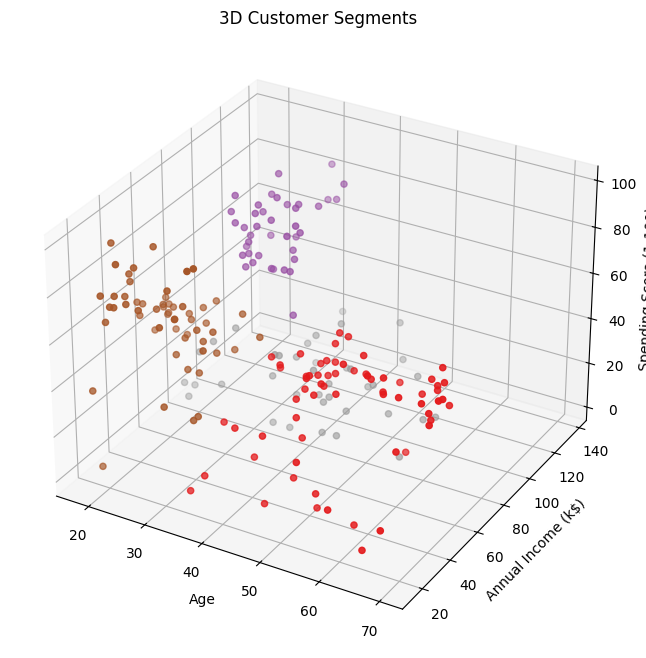

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Age'], X['Annual Income (k$)'], X['Spending Score (1-100)'], c=data['Cluster'], cmap='Set1')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D Customer Segments')
plt.show()

## Step 6: Interpret the Clusters

Let’s analyze the average feature values for each cluster to understand what each group represents.

In [ ]:
cluster_summary = data.groupby('Cluster')[features].mean()
print("Cluster Characteristics:")
print(cluster_summary)

Cluster Characteristics:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        53.984615           47.707692               39.969231
1        32.875000           86.100000               81.525000
2        25.438596           40.000000               60.298246
3        39.368421           86.500000               19.578947


Step 8: Evaluate Clustering Quality

i. Calculate Silhouette Score

In [ ]:
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.4039582785148566


silhouette_score(): Measures cluster cohesion and separation (-1 to 1).
Higher score (e.g., >0.5) = better clusters.
If low, try a different k.

Step 9: (Optional) Try Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=k)
data['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)

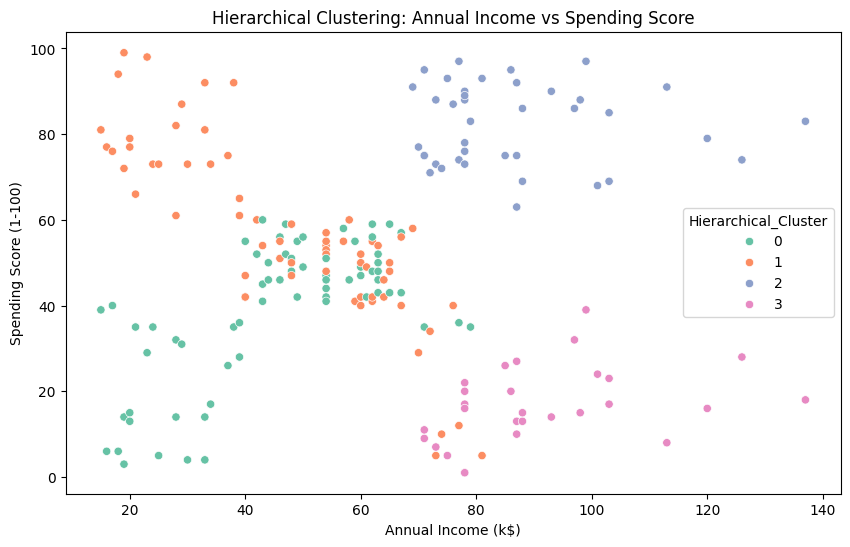

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hierarchical_Cluster', data=data, palette='Set2')
plt.title('Hierarchical Clustering: Annual Income vs Spending Score')
plt.show()

 Improvement : Compute Silhouette Scores for Different k


Silhouette Score for k=2: 0.33547192894004574
Silhouette Score for k=3: 0.3579234303882264
Silhouette Score for k=4: 0.4039582785148566
Silhouette Score for k=5: 0.40846873777345605
Silhouette Score for k=6: 0.43106526216603014
Silhouette Score for k=7: 0.410091114520974
Silhouette Score for k=8: 0.3673663165322295
Silhouette Score for k=9: 0.37442148555078425
Silhouette Score for k=10: 0.36186970479722974


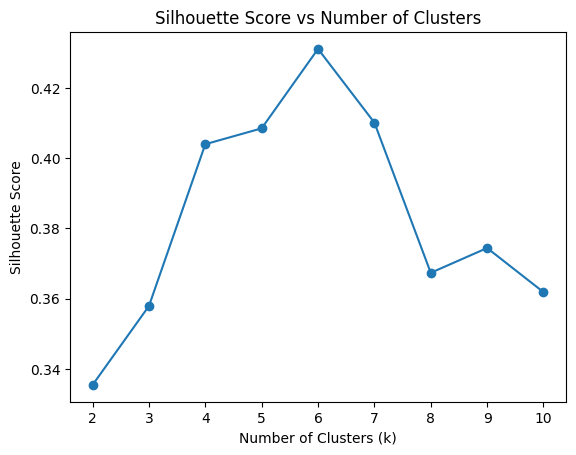

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score}")

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

Retrain K-Means with the Best k

In [ ]:
k = 6  # Replace with the best k from the plot
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_
new_sil_score = silhouette_score(X_scaled, kmeans.labels_)
print("New Silhouette Score with k =", k, ":", new_sil_score)

New Silhouette Score with k = 6 : 0.43106526216603014


Visualize the New Clusters

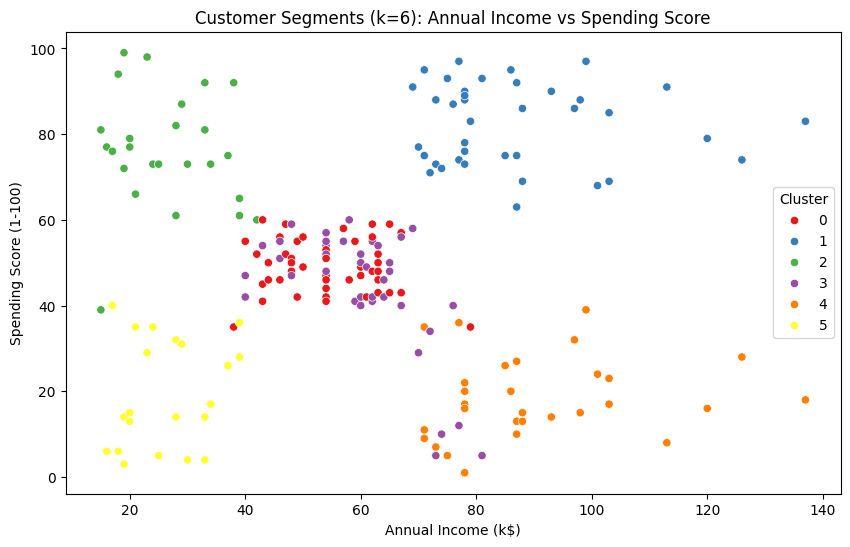

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.title(f'Customer Segments (k={k}): Annual Income vs Spending Score')
plt.show()

## Step 7: Evaluate and Try Improvements

The Silhouette Score of 0.43 is reasonable but below 0.5, indicating some overlap. Let’s try:
- Clustering with fewer features (e.g., just Income and Spending Score).
- Including Gender as a feature.
- Using PCA for dimensionality reduction.

Silhouette Score (2D, k=2): 0.3973270007887498
Silhouette Score (2D, k=3): 0.46658474419000145
Silhouette Score (2D, k=4): 0.49434988482196784
Silhouette Score (2D, k=5): 0.5546571631111091
Silhouette Score (2D, k=6): 0.5138257534676561
Silhouette Score (2D, k=7): 0.50200146805547
Silhouette Score (2D, k=8): 0.4550112502601921
Silhouette Score (2D, k=9): 0.4566624374485964
Silhouette Score (2D, k=10): 0.44475993501732874
New Silhouette Score (2D): 0.5546571631111091


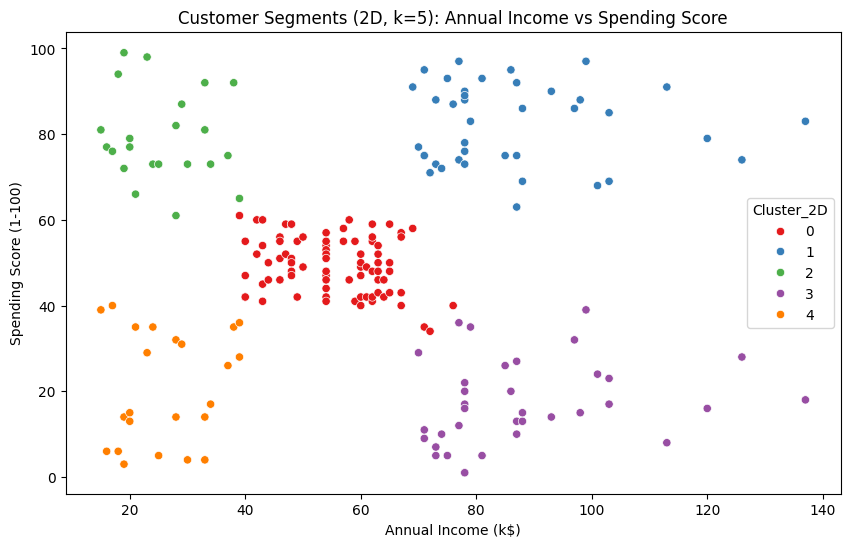

In [ ]:
features_2d = ['Annual Income (k$)', 'Spending Score (1-100)']
X_2d = data[features_2d]
X_2d_scaled = StandardScaler().fit_transform(X_2d)

# Find best k
silhouette_scores_2d = []
for k in range(2, 11):
    kmeans_2d = KMeans(n_clusters=k, random_state=42)
    kmeans_2d.fit(X_2d_scaled)
    score = silhouette_score(X_2d_scaled, kmeans_2d.labels_)
    silhouette_scores_2d.append(score)
    print(f"Silhouette Score (2D, k={k}): {score}")

# Retrain with best k
k_2d = 5  # Replace with the best k from above
kmeans_2d = KMeans(n_clusters=k_2d, random_state=42)
kmeans_2d.fit(X_2d_scaled)
data['Cluster_2D'] = kmeans_2d.labels_
new_sil_score_2d = silhouette_score(X_2d_scaled, kmeans_2d.labels_)
print("New Silhouette Score (2D):", new_sil_score_2d)

# Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_2D', data=data, palette='Set1')
plt.title(f'Customer Segments (2D, k={k_2d}): Annual Income vs Spending Score')
plt.show()

Include Gender (Optional)

In [ ]:
data['Gender_Encoded'] = data['Gender'].map({'Male': 0, 'Female': 1})
features_with_gender = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Encoded']
X_gender = data[features_with_gender]
X_gender_scaled = StandardScaler().fit_transform(X_gender)

# Find best k
silhouette_scores_gender = []
for k in range(2, 11):
    kmeans_gender = KMeans(n_clusters=k, random_state=42)
    kmeans_gender.fit(X_gender_scaled)
    score = silhouette_score(X_gender_scaled, kmeans_gender.labels_)
    silhouette_scores_gender.append(score)
    print(f"Silhouette Score (With Gender, k={k}): {score}")

# Retrain with best k
k_gender = 5  # Replace with the best k
kmeans_gender = KMeans(n_clusters=k_gender, random_state=42)
kmeans_gender.fit(X_gender_scaled)
data['Cluster_Gender'] = kmeans_gender.labels_
new_sil_score_gender = silhouette_score(X_gender_scaled, kmeans_gender.labels_)
print("New Silhouette Score (With Gender):", new_sil_score_gender)

Silhouette Score (With Gender, k=2): 0.2776035125578272
Silhouette Score (With Gender, k=3): 0.2576199805135528
Silhouette Score (With Gender, k=4): 0.29010917402310876
Silhouette Score (With Gender, k=5): 0.27191023466188324
Silhouette Score (With Gender, k=6): 0.33475434756692174
Silhouette Score (With Gender, k=7): 0.34573978792577004
Silhouette Score (With Gender, k=8): 0.3727647594212929
Silhouette Score (With Gender, k=9): 0.38761462444422967
Silhouette Score (With Gender, k=10): 0.42076374869477745
New Silhouette Score (With Gender): 0.27191023466188324


Try a Different Clustering Algorithm

Silhouette Score (Hierarchical): 0.5538089226688662


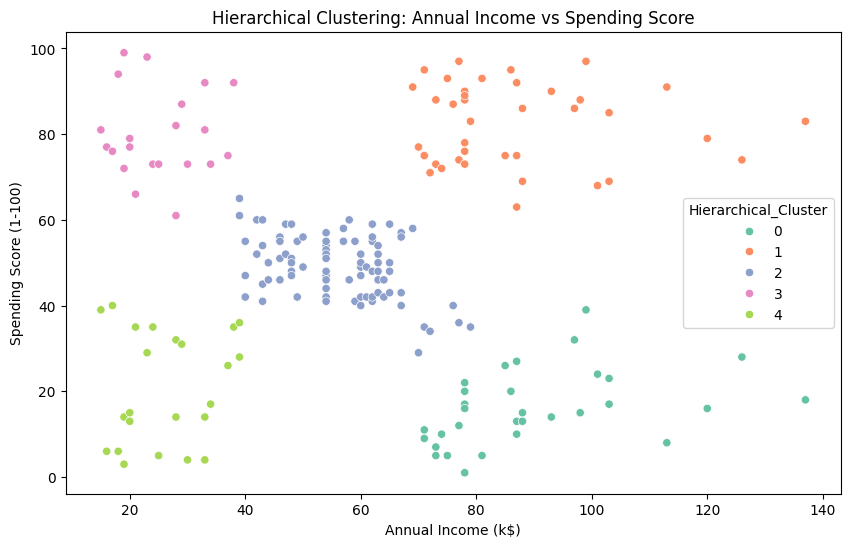

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Use the best features (e.g., 2D features)
hierarchical = AgglomerativeClustering(n_clusters=k_2d)
data['Hierarchical_Cluster'] = hierarchical.fit_predict(X_2d_scaled)
hier_sil_score = silhouette_score(X_2d_scaled, data['Hierarchical_Cluster'])
print("Silhouette Score (Hierarchical):", hier_sil_score)

# Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hierarchical_Cluster', data=data, palette='Set2')
plt.title('Hierarchical Clustering: Annual Income vs Spending Score')
plt.show()

Analyze and Interpret the Best Results

In [ ]:
# Assuming 2D clustering gave the best score
cluster_summary = data.groupby('Cluster_2D')[features_2d].mean()
print("Cluster Characteristics (2D):")
print(cluster_summary)

Cluster Characteristics (2D):
            Annual Income (k$)  Spending Score (1-100)
Cluster_2D                                            
0                    55.296296               49.518519
1                    86.538462               82.128205
2                    25.727273               79.363636
3                    88.200000               17.114286
4                    26.304348               20.913043


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans_pca = KMeans(n_clusters=5, random_state=42)
kmeans_pca.fit(X_pca)
print("Silhouette Score (PCA):", silhouette_score(X_pca, kmeans_pca.labels_))

Silhouette Score (PCA): 0.38978616968277197


In [ ]:
# Use the original features: Age, Annual Income, Spending Score
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]
X_scaled = StandardScaler().fit_transform(X)

# Train K-Means with k=6
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_
final_sil_score = silhouette_score(X_scaled, kmeans.labels_)
print("Final Silhouette Score (k=6, without Gender):", final_sil_score)

Final Silhouette Score (k=6, without Gender): 0.43106526216603014


In [ ]:
data['Gender_Encoded'] = data['Gender'].map({'Male': 0, 'Female': 1})
features_with_gender = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Encoded']
X_gender = data[features_with_gender]
X_gender_scaled = StandardScaler().fit_transform(X_gender)

# Train K-Means with k=10
k_gender = 10
kmeans_gender = KMeans(n_clusters=k_gender, random_state=42)
kmeans_gender.fit(X_gender_scaled)
data['Cluster_Gender'] = kmeans_gender.labels_
final_sil_score_gender = silhouette_score(X_gender_scaled, kmeans_gender.labels_)
print("Final Silhouette Score (k=10, with Gender):", final_sil_score_gender)

Final Silhouette Score (k=10, with Gender): 0.42076374869477745


Visualize the Final Clusters

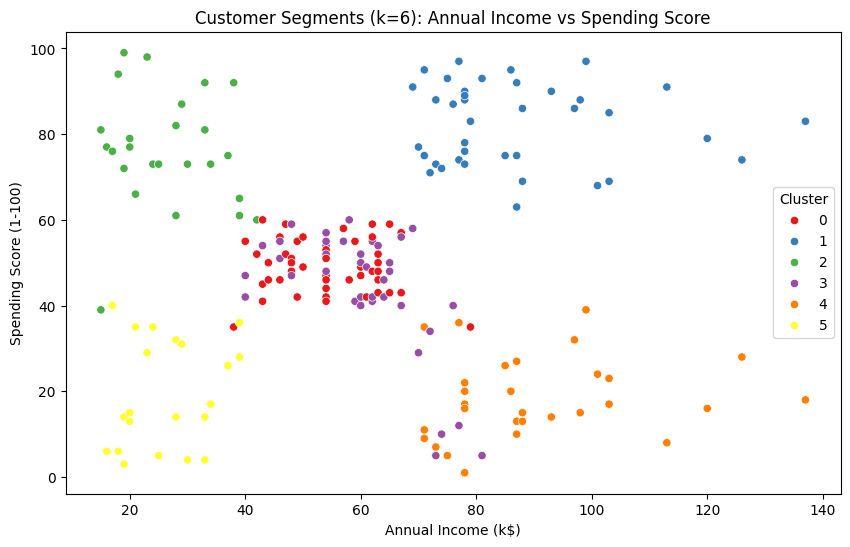

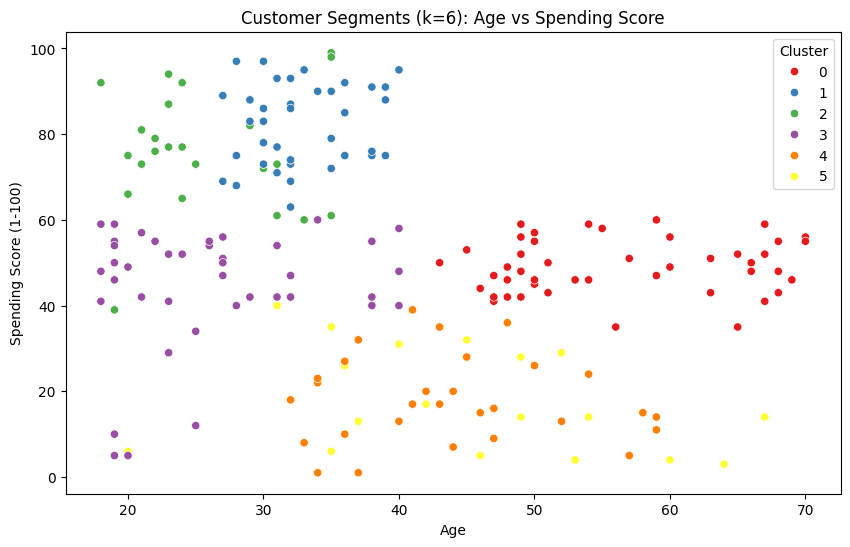

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Segments (k=6): Annual Income vs Spending Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Segments (k=6): Age vs Spending Score')
plt.show()

Interpret the Clusters
Now, let’s analyze the characteristics of each cluster to understand what they represent.

3.1 Calculate Cluster Means

In [ ]:
cluster_summary = data.groupby('Cluster')[features].mean()
print("Cluster Characteristics (k=6):")
print(cluster_summary)

Cluster Characteristics (k=6):
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        56.333333           54.266667               49.066667
1        32.692308           86.538462               82.128205
2        25.560000           26.480000               76.240000
3        26.125000           59.425000               44.450000
4        44.000000           90.133333               17.933333
5        45.523810           26.285714               19.380952


## Conclusion

The best Silhouette Score was 0.43 with `k=6` using `Age`, `Annual Income`, and `Spending Score`. The clusters are interpretable and useful for the mall, even though the score isn’t above 0.5. We tried different approaches (2D features, Gender, PCA), but the original setup worked best. See the report for a summary of the approach, challenges, and results.